Analyzing Neighborhoods in Mumbai, India for Starting a Restaurant

Introduction

Mumbai is the financial capital of India and is one of the most densely populated cities in the world. It lies on the west coast of India and attracts heavy tourism from all over the globe every year. Personally, I have been brought up in Mumbai and have loved the city from the bottom of my heart. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. The multi-cultural nature of the city of Mumbai has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for opening a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.


Data Collection

The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.

Neighborhoods Data

The data of the neighborhoods in Mumbai was scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas.

Geographical Coordinates

The geographical coordinates for Mumbai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Mumbai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Mumbai. The coordinates of all neighborhoods in Mumbai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python.

Venue Data

The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Mumbai and is used to study the popular venues of different neighborhoods.

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.4 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [3]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Kandivali West,Western Suburbs      3
Mira-Bhayandar,Western Suburbs      3
Ghatkopar,Eastern Suburbs           3
Powai,Eastern Suburbs               3
Bandra,Western Suburbs              3
Goregaon,Western Suburbs            2
Kalbadevi,South Mumbai              2
Malad,Western Suburbs               2
Khar,Western Suburbs                2
Borivali (West),Western Suburbs     2
Mumbai                              2
Vasai,Western Suburbs               2
Harbour Suburbs                     2
Vile Parle,Western Suburbs          1
Sanctacruz,Western Suburbs          1
Kandivali East,Western Suburbs      1
Govandi,Harbour Suburbs             1
Fort,South Mumbai                   1
Antop Hill,South Mumbai             1
Byculla,South Mumbai                1
Kurla,Eastern Suburbs               1
Trombay,Harbour Suburbs             1
Tardeo,South

In [4]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [5]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>


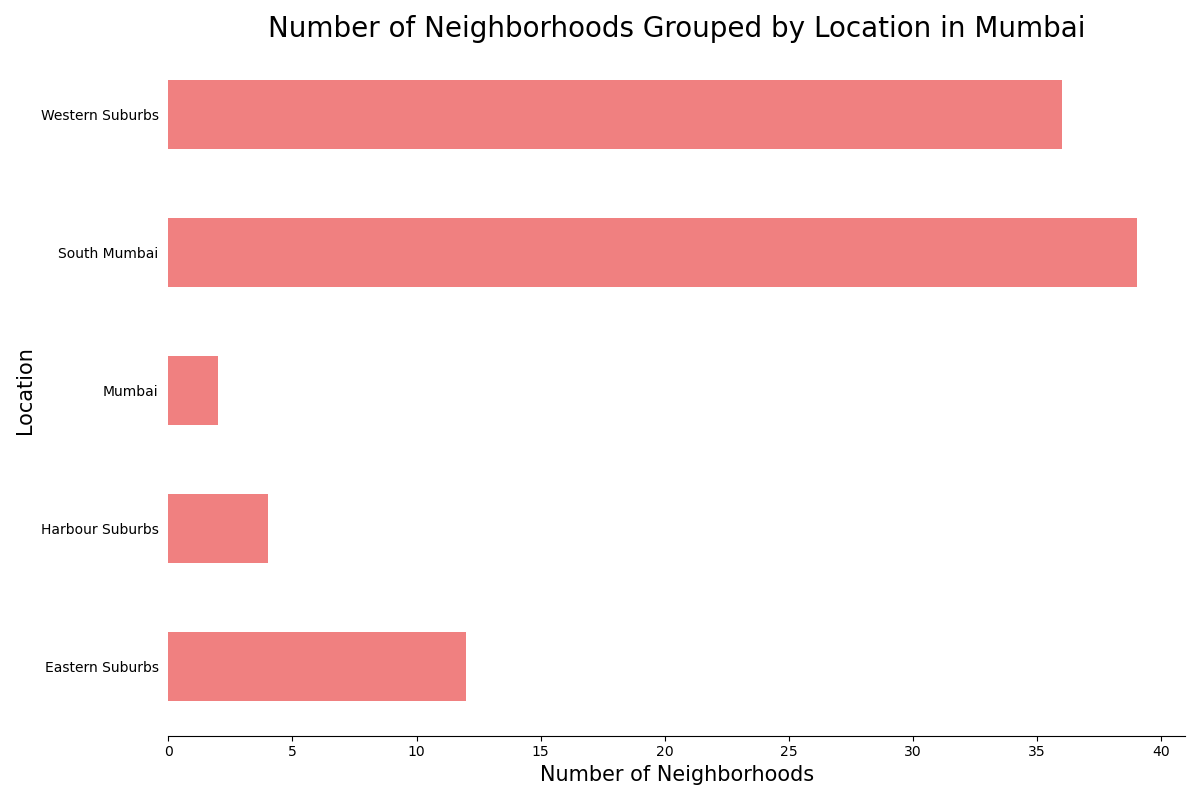

In [6]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_mumbai.plot(kind='barh', color='lightcoral')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

In [7]:
address = 'Mumbai, IN'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


In [8]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

In [9]:
CLIENT_ID = 'KSTGWM205LYCAIS2FRDXYBO3EX2341YIMOVBIR3UKDHBIJTQ' 
CLIENT_SECRET = '3DFT205PKPR4NCESYF2PQS0EBVPOHYNSIPLQ2R4FL5HTMJWM' 
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KSTGWM205LYCAIS2FRDXYBO3EX2341YIMOVBIR3UKDHBIJTQ
CLIENT_SECRET:3DFT205PKPR4NCESYF2PQS0EBVPOHYNSIPLQ2R4FL5HTMJWM


In [10]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.8434 longitude


In [11]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e42688b653c25d481d7505'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.8529082359012},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83389176409881}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d10d39b7177b1f7d2c75322',
       'name': 'Cafe Arfa',
       'location': {'address': 'S V Road',
        'crossStreet': 'Andheri West',
        'lat': 19.12893009094341,
        'lng': 72.84714004510111,
        'labeledLatLngs': [{'label':

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Cafe Arfa,Indian Restaurant,19.128930,72.847140
1,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
2,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
3,Domino's Pizza,Pizza Place,19.131000,72.848000
4,Shetty's Corner,Chinese Restaurant,19.124845,72.837858


In [15]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

33 venues were returned for Amboli by Foursquare


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


In [18]:
print(mum_venues.shape)
mum_venues.head(10)

(3657, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,19.1293,72.8434,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
2,Amboli,19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
3,Amboli,19.1293,72.8434,Domino's Pizza,19.131000,72.848000,Pizza Place
4,Amboli,19.1293,72.8434,Shetty's Corner,19.124845,72.837858,Chinese Restaurant
5,Amboli,19.1293,72.8434,Garden Court,19.127188,72.837478,Indian Restaurant
6,Amboli,19.1293,72.8434,Kamal Chhaya Bar,19.128245,72.837610,Bar
7,Amboli,19.1293,72.8434,Persia Darbar,19.136952,72.846822,Indian Restaurant
8,Amboli,19.1293,72.8434,Mirabella Bar & Kitchen,19.134144,72.836867,Cocktail Bar
9,Amboli,19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place


In [19]:
mum_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,8,8,8,8,8,8
1,Agripada,21,21,21,21,21,21
2,Altamount Road,80,80,80,80,80,80
3,Amboli,33,33,33,33,33,33
4,Amrut Nagar,51,51,51,51,51,51
...,...,...,...,...,...,...,...
85,Vikhroli,5,5,5,5,5,5
86,Vile Parle,75,75,75,75,75,75
87,Virar,7,7,7,7,7,7
88,Walkeshwar,10,10,10,10,10,10


In [20]:
print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 223 unique categories


In [21]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,...,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(90, 223)


,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.030303,0.030303,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Chakala, Andheri",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.046512,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,D.N. Nagar,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.049180,0.0,0.0,0.0,0.0,0.032787,0.0,0.0
3,Four Bungalows,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.061224,0.0,0.0,0.0,0.0,0.020408,0.0,0.0
4,Lokhandwala,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.0,0.0,...,0.0,0.000000,0.020408,0.0,0.0,0.0,0.0,0.010204,0.0,0.0
5,Marol,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,Sahar,0.0,0.043478,0.028986,0.028986,0.072464,0.028986,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,Seven Bungalows,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.035714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,Versova,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.029412,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,Mira Road,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [25]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
                venue  freq
0   Indian Restaurant  0.15
1                 Bar  0.12
2         Pizza Place  0.09
3                 Pub  0.06
4  Chinese Restaurant  0.06


----Chakala, Andheri----
                venue  freq
0               Hotel  0.14
1   Indian Restaurant  0.14
2                Café  0.09
3  Seafood Restaurant  0.07
4          Restaurant  0.05


----D.N. Nagar----
                  venue  freq
0                   Bar  0.10
1           Pizza Place  0.07
2     Indian Restaurant  0.07
3  Gym / Fitness Center  0.07
4           Coffee Shop  0.05


----Four Bungalows----
                           venue  freq
0              Indian Restaurant  0.10
1                            Pub  0.08
2                    Coffee Shop  0.06
3                           Café  0.06
4  Vegetarian / Vegan Restaurant  0.06


----Lokhandwala----
               venue  freq
0                Bar  0.08
1                Pub  0.07
2  Indian Restaurant  0.07
3        Pizza Place  0.06
4    

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Asian Restaurant,Pub,Chinese Restaurant,Cocktail Bar,Mughlai Restaurant,Falafel Restaurant
1,"Chakala, Andheri",Indian Restaurant,Hotel,Café,Seafood Restaurant,Chinese Restaurant,Multiplex,Pizza Place,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
2,D.N. Nagar,Bar,Indian Restaurant,Pizza Place,Gym / Fitness Center,Pub,Vegetarian / Vegan Restaurant,Coffee Shop,Women's Store,Lounge,Snack Place
3,Four Bungalows,Indian Restaurant,Pub,Bar,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Lounge
4,Lokhandwala,Bar,Indian Restaurant,Pub,Coffee Shop,Pizza Place,Lounge,Asian Restaurant,Italian Restaurant,Café,Multiplex
...,...,...,...,...,...,...,...,...,...,...,...
85,Parel,Plaza,Bakery,Restaurant,Bar,Roof Deck,Multiplex,Fast Food Restaurant,Hotel,Chinese Restaurant,Indian Restaurant
86,Gowalia Tank,Indian Restaurant,Café,Bakery,Fast Food Restaurant,Coffee Shop,Sandwich Place,Snack Place,Electronics Store,Clothing Store,Pizza Place
87,Dava Bazaar,Indian Restaurant,Café,Bar,Chinese Restaurant,Fast Food Restaurant,Jewelry Store,Coffee Shop,Harbor / Marina,Train Station,Bakery
88,Dharavi,Indian Restaurant,Fast Food Restaurant,Bakery,Coffee Shop,Tea Room,Chinese Restaurant,Arcade,Juice Bar,Café,Dance Studio


In [43]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [44]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.48292907130473406, 0.5702033777674622, 0.0799715444101304, 0.0812205660969327, 0.09663630985798768, 0.09962318092864265, 0.14396497751118348, 0.12224992267615957, 0.13159841789771584, 0.09577881613380873, 0.08608681582750867, 0.08916472362937497, 0.047912055690397505, 0.0726128424062181]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<IPython.core.display.Javascript object>


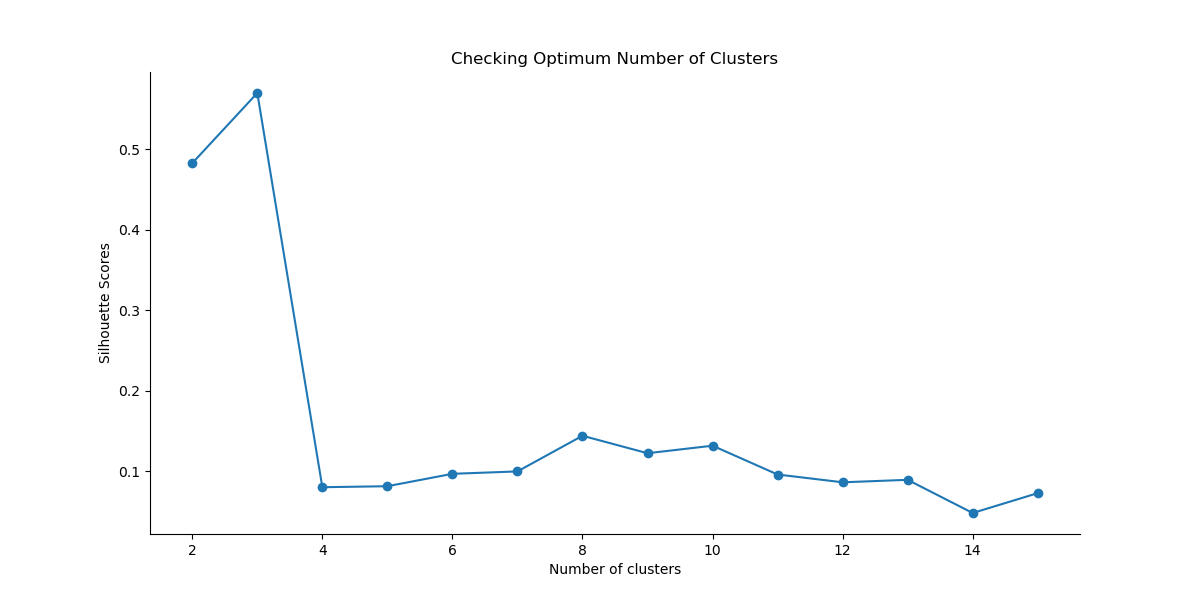

In [45]:
print(scores)
print(kval)
plot(kval, scores)

In [46]:
k = 5

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4,
       4, 1, 3, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 3, 1, 1, 4, 3, 1, 1, 1,
       2, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 3, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4], dtype=int32)

In [47]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
mum_merged['Cluster Labels'] = pd.to_numeric(mum_merged['Cluster Labels'], errors='coerce')
mum_merged = mum_merged.dropna(subset=['Cluster Labels'])
print(mum_merged[mum_merged['Cluster Labels'].isnull()])
mum_merged['Cluster Labels'] = mum_merged['Cluster Labels'].astype(int)

Empty DataFrame
Columns: [Neighborhood, Location, Latitude, Longitude, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []


In [48]:
print(mum_merged.shape)
mum_merged

(90, 15)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.129300,72.843400,1,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Asian Restaurant,Pub,Chinese Restaurant,Cocktail Bar,Mughlai Restaurant,Falafel Restaurant
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,1,Indian Restaurant,Hotel,Café,Seafood Restaurant,Chinese Restaurant,Multiplex,Pizza Place,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,1,Bar,Indian Restaurant,Pizza Place,Gym / Fitness Center,Pub,Vegetarian / Vegan Restaurant,Coffee Shop,Women's Store,Lounge,Snack Place
3,Four Bungalows,Western Suburbs,19.124714,72.827210,1,Indian Restaurant,Pub,Bar,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Lounge
4,Lokhandwala,Western Suburbs,19.130815,72.829270,1,Bar,Indian Restaurant,Pub,Coffee Shop,Pizza Place,Lounge,Asian Restaurant,Italian Restaurant,Café,Multiplex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000,1,Plaza,Bakery,Restaurant,Bar,Roof Deck,Multiplex,Fast Food Restaurant,Hotel,Chinese Restaurant,Indian Restaurant
89,Gowalia Tank,South Mumbai,18.962450,72.809703,1,Indian Restaurant,Café,Bakery,Fast Food Restaurant,Coffee Shop,Sandwich Place,Snack Place,Electronics Store,Clothing Store,Pizza Place
90,Dava Bazaar,South Mumbai,18.946882,72.831362,4,Indian Restaurant,Café,Bar,Chinese Restaurant,Fast Food Restaurant,Jewelry Store,Coffee Shop,Harbor / Marina,Train Station,Bakery
91,Dharavi,Mumbai,19.040208,72.850850,4,Indian Restaurant,Fast Food Restaurant,Bakery,Coffee Shop,Tea Room,Chinese Restaurant,Arcade,Juice Bar,Café,Dance Studio


In [49]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(mum_merged['Latitude'], mum_merged['Longitude'], mum_merged['Neighborhood'], mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [50]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Nalasopara,Western Suburbs,Bar,Bus Station,Zoo,Fast Food Restaurant,Farm,Falafel Restaurant,Factory,Event Space,Electronics Store,Duty-free Shop


In [51]:
mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Asian Restaurant,Pub,Chinese Restaurant,Cocktail Bar,Mughlai Restaurant,Falafel Restaurant
1,"Chakala, Andheri",Western Suburbs,Indian Restaurant,Hotel,Café,Seafood Restaurant,Chinese Restaurant,Multiplex,Pizza Place,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
2,D.N. Nagar,Western Suburbs,Bar,Indian Restaurant,Pizza Place,Gym / Fitness Center,Pub,Vegetarian / Vegan Restaurant,Coffee Shop,Women's Store,Lounge,Snack Place
3,Four Bungalows,Western Suburbs,Indian Restaurant,Pub,Bar,Coffee Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Lounge
4,Lokhandwala,Western Suburbs,Bar,Indian Restaurant,Pub,Coffee Shop,Pizza Place,Lounge,Asian Restaurant,Italian Restaurant,Café,Multiplex
6,Sahar,Western Suburbs,Coffee Shop,Café,Fast Food Restaurant,Hotel,Airport Service,Indian Restaurant,Airport,Lounge,Airport Food Court,Airport Lounge
7,Seven Bungalows,Western Suburbs,Café,Pub,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Bar,Pizza Place,Indian Restaurant,Beach,Seafood Restaurant
8,Versova,Western Suburbs,Indian Restaurant,Café,Coffee Shop,Multiplex,Chinese Restaurant,Pub,Donut Shop,Japanese Restaurant,Beach,Spa
9,Mira Road,Western Suburbs,Pizza Place,Indian Restaurant,Gym / Fitness Center,Café,Multiplex,Convenience Store,Asian Restaurant,Sculpture Garden,Sandwich Place,Fast Food Restaurant
12,Bandstand Promenade,Western Suburbs,Coffee Shop,Scenic Lookout,Fast Food Restaurant,Indian Restaurant,Boutique,Boat or Ferry,Lounge,Beach,Café,Italian Restaurant


In [52]:
mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Mahalaxmi,South Mumbai,Arcade,Zoo,Dim Sum Restaurant,Farm,Falafel Restaurant,Factory,Event Space,Electronics Store,Duty-free Shop,Dumpling Restaurant


In [53]:
mum_merged.loc[mum_merged['Cluster Labels'] == 3, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Uttan,Western Suburbs,Beach,Playground,Indian Restaurant,Resort,Bus Station,Zoo,Dim Sum Restaurant,Factory,Event Space,Electronics Store
47,Vikhroli,Eastern Suburbs,Comedy Club,Pool,Bakery,Scenic Lookout,Soccer Field,Dim Sum Restaurant,Factory,Event Space,Electronics Store,Duty-free Shop
60,Cuffe Parade,South Mumbai,Park,Asian Restaurant,Beach,Basketball Court,Department Store,Italian Restaurant,Dive Bar,Farm,Falafel Restaurant,Factory
64,Dongri,South Mumbai,Beach,Playground,Indian Restaurant,Resort,Bus Station,Zoo,Dim Sum Restaurant,Factory,Event Space,Electronics Store
81,Navy Nagar,South Mumbai,Golf Course,Asian Restaurant,Beach,General Entertainment,Dim Sum Restaurant,Farm,Falafel Restaurant,Factory,Event Space,Electronics Store


In [54]:
mum_merged.loc[mum_merged['Cluster Labels'] == 4, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Marol,Western Suburbs,Indian Restaurant,Hotel,Chinese Restaurant,Fast Food Restaurant,Diner,Boat or Ferry,Ice Cream Shop,Restaurant,Coffee Shop,Cupcake Shop
10,Bhayandar,Western Suburbs,Fast Food Restaurant,Indian Restaurant,Multiplex,Burger Joint,Food Truck,Pizza Place,Coffee Shop,Mexican Restaurant,Restaurant,Light Rail Station
16,Gorai,Western Suburbs,Beach,Food,Seafood Restaurant,Indian Restaurant,Zoo,Diner,Falafel Restaurant,Factory,Event Space,Electronics Store
20,Jogeshwari West,Western Suburbs,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Electronics Store,Shop & Service,Restaurant,Light Rail Station,Breakfast Spot,Food Court,Café
24,Mahavir Nagar,Western Suburbs,Indian Restaurant,Fast Food Restaurant,Pizza Place,Food,Coffee Shop,Chinese Restaurant,Electronics Store,Park,Donut Shop,Sporting Goods Shop
34,Irla,Western Suburbs,Indian Restaurant,Ice Cream Shop,Café,Snack Place,Seafood Restaurant,Sandwich Place,Park,Coffee Shop,Bar,Fast Food Restaurant
38,Asalfa,Eastern Suburbs,Indian Restaurant,Juice Bar,Coffee Shop,Donut Shop,Gym / Fitness Center,Men's Store,Bakery,Factory,Vegetarian / Vegan Restaurant,Light Rail Station
39,Pant Nagar,Eastern Suburbs,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Gym / Fitness Center,Coffee Shop,Dessert Shop,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Sculpture Garden
44,Hiranandani Gardens,Eastern Suburbs,Indian Restaurant,Bar,Ice Cream Shop,Dessert Shop,Restaurant,Lounge,Bakery,Chinese Restaurant,Italian Restaurant,Pizza Place
45,Indian Institute of Technology Bombay campus,Eastern Suburbs,Indian Restaurant,Asian Restaurant,Dance Studio,Building,Café,Food Court,Department Store,Diner,Coffee Shop,Event Space


Results and Discussion

By analyzing the five clusters obtained we can see that some of the clusters are more suited for restaurants and hotels, whereas, other clusters are less suited. Neighborhoods in clusters 1, 3, and 4 contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new restaurant. On the other hand, neighborhoods in clusters 1 and 2 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in these clusters would be well suited for opening a new restaurant.



Conclusion

We have successfully analyzed the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a new restaurant. Based on our analysis, neighborhoods in cluster 1 are recommended as locations for the new restaurant. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered